In [6]:
import os
import sys
par_dir = os.path.dirname(os.path.realpath("."))
sys.path.append(os.path.join(par_dir))
from utils import *
import json
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

## BERT-Base VS. BERT-Large on SST2

In [7]:
data_path = json.load(open('outputPaths_sst2.json', 'r'))
print(data_path)
bert_base_disjoint_path = data_path['disjoint']['bert-base']
bert_large_disjoint_path = data_path['disjoint']['bert-large']
bert_joint_path = data_path['joint']
baseline_base = data_path['baseline_base']
baseline_large = data_path['baseline_large']

{'disjoint': {'bert-base': '/data1/cl/generalizable-interaction/output/task1/traditional/base', 'bert-large': '/data1/cl/generalizable-interaction/output/task1/traditional/large'}, 'joint': '/data1/cl/generalizable-interaction/output/task1/generalizable', 'baseline_base': '/data1/cl/distillation/output/base/2023-11-14-19-59-58_q_tricks_False/PAD', 'baseline_large': '/data1/cl/distillation/output/large/2023-11-14-20-23-56_q_tricks_False/PAD'}


In [8]:
inds = get_inds(bert_joint_path, dataset = "sst2")
joint_path = bert_joint_path
print(joint_path)
print(len(inds))
labels = ['ours', 'traditional method']
log = False
alphas = [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

/data1/cl/generalizable-interaction/output/task1/generalizable
200


ind: 100%|██████████| 200/200 [00:06<00:00, 30.88it/s]


there are 3942 salient interactions (> 1/20 * max I) / 409600


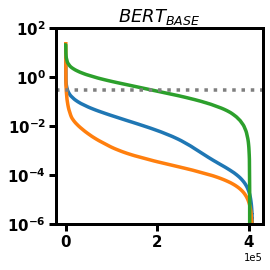

In [9]:
# Bert-Base
plot_sparsify_contrast_baseline(joint_path,baseline_base,  inds, bert_base_disjoint_path, labels=["ours","baseline","traditional"],
                                title=r'$BERT_{BASE}$', log=log,is_base=True, add_or=True)

ind: 100%|██████████| 200/200 [00:05<00:00, 39.52it/s]


there are 10908 salient interactions (> 1/20 * max I) / 409600


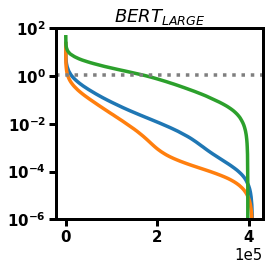

In [10]:
# Bert-Large
plot_sparsify_contrast_baseline(joint_path,baseline_large,  inds, bert_large_disjoint_path, labels=["ours","baseline","traditional"],
                                title=r'$BERT_{LARGE}$', log=log, is_base=False, add_or=True)

## LlaMa VS. OPT-1.3B on SQuAD

In [11]:
# path
data_path = json.load(open('outputPaths_squad.json', 'r'))
joint_path = data_path['joint']
llama_disjoint_path = data_path['disjoint']['llama']
opt_disjoint_path = data_path['disjoint']['opt']

# inds
joint_inds = get_inds(joint_path, dataset = "squad")
llama_disjoint_inds = get_inds(data_path['disjoint']['llama'], dataset = "squad")
opt_disjoint_inds = get_inds(data_path['disjoint']['opt'], dataset = "squad")

joint_inds = [ind for ind in joint_inds if ind != 296]
inds = joint_inds[:200]

labels = ['ours','traditional method']


ind: 100%|██████████| 200/200 [00:04<00:00, 49.96it/s]


there are 490 salient interactions (> 1/20 * max I) / 409600


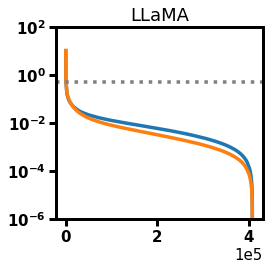

In [12]:
plot_sparsify_contrast(joint_path,llama_disjoint_path,inds,labels=labels,save_path=None,title='LLaMA',log=True, dataset = "squad")

ind: 100%|██████████| 200/200 [00:03<00:00, 56.93it/s]


there are 295 salient interactions (> 1/20 * max I) / 409600


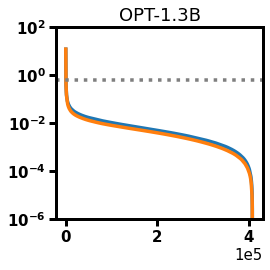

In [13]:
plot_sparsify_contrast(joint_path,opt_disjoint_path,inds,labels=labels,save_path=None,title='OPT-1.3B',is_llama=False,log=True, dataset = "squad")

## ResNet-20 VS. VGG-16 on MNIST

In [14]:
# path
data_path = json.load(open('outputPaths_mnist.json', 'r'))
joint_path = data_path['joint']
resnet20_disjoint_path = data_path['disjoint']['resnet20']  
vgg16_disjoint_path = data_path['disjoint']['vgg16'] 

# inds
inds = get_inds(data_path['joint'], dataset = "mnist")[:100] 

labels = ['ours', 'traditional method']
log = False

ind: 100%|██████████| 100/100 [00:00<00:00, 300.20it/s]


there are 2559 salient interactions (> 1/20 * max I) / 51200


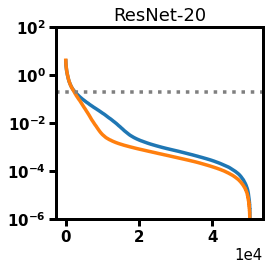

In [15]:
plot_sparsify_contrast(joint_path,resnet20_disjoint_path,inds,labels=labels,save_path=None,title='ResNet-20',log=log, dataset = "mnist")

ind: 100%|██████████| 100/100 [00:00<00:00, 367.07it/s]


there are 3184 salient interactions (> 1/20 * max I) / 51200


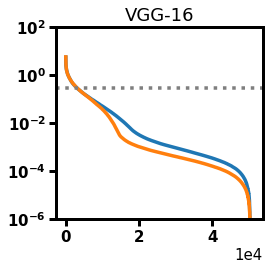

In [16]:
plot_sparsify_contrast(joint_path,vgg16_disjoint_path,inds,labels=labels,save_path=None,title='VGG-16',is_base=False,log=log, dataset = "mnist")